# Set up file 

In [1]:
%%sh

pip install -U category_encoders

Requirement already up-to-date: category_encoders in /home/z5145948/miniconda2/lib/python2.7/site-packages (2.0.0)


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
You are using pip version 19.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable  
import matplotlib
import scipy
import scipy.interpolate
import sys
sys.path.insert(0, '/srv/ccrc/data06/z5145948/Python/python_from_R/Holocene/sampled_models/plotting_files/')
from plott import plott
import scipy.interpolate
from mpl_toolkits.basemap import Basemap
matplotlib.use('agg')
from Cross_section import Cross_section
from Proxy_graph_masked import Proxy_graph
import Config
from Map_plot import Map_plot
from collections import Counter
import scipy.stats as stats
from pylab import *
rcParams['legend.numpoints'] = 1
from matplotlib.ticker import MaxNLocator
import time
from IPython import embed
import os
import ast
from matplotlib import gridspec
from category_encoders.one_hot import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{wasysym}',
    r'\usepackage{textcomp}']

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200

%matplotlib inline

/home/z5145948/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/z5145948/miniconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/z5145948/miniconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/z5145948/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/z5145948/miniconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/z5145948/miniconda2/lib/python2.7/site-packages/ipykernel/

In [3]:
# Import standardised latitudes and depths
lat_standardised = np.genfromtxt('/srv/ccrc/data06/z5145948/Moving_water_mass/Data/latitude_levels.csv', delimiter=',')
dep_standardised = np.genfromtxt('/srv/ccrc/data06/z5145948/Moving_water_mass/Data/depth_levels.csv', delimiter=',')

# File saving location
overleaf_loc = '/home/z5145948/Dropbox/Apps/Overleaf/Paper_2/Figures'

# Set universal dividing depth
dividing_depth = 2500

# Set colors
alpha = 0.5
point_color_deep = (0,0,1,alpha)#'blue'
point_color_shallow = (1,0,0,alpha)#'red'
line_color_deep = 'cyan'
line_color_shallow = 'magenta'

# Font size
fontsize = 20

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fontsize}
matplotlib.rc('font', **font)

# Separate into different areas
point_size_power = 1
points_size_multiplier = 10
south_lat_max = -15
north_lat_min = 15
lw = 4
edgewidth=0.5
size = 40
weighting = False

slice_width = 0.5



In [4]:
# Define a function for reading and including cores that are in the Oliver compilation but not in the Peterson data set

def Oliver_cores(minn, maxx):
    import pandas as pd
    import numpy as np
    folder_location = '/srv/ccrc/data06/z5145948/Moving_water_mass/Data/Core_files/'
    file_mat = ['GeoB4403_2.txt',
             'GeoB1028_5.txt',
             'GeoB2109_1.txt',
             'GeoB3801_6.txt',
             'V22_38.txt',
             'V28_56.txt',
             'V27_20.txt',
             'RC12_339.txt',
             'V32_128.txt',
             'GIK16772_1.txt',
             'MD96_2080.txt',
             'MD06_3018.txt',
             'NEAP18K.txt',
             'KNR140_37JPC.txt']


    location = ['Atlantic,','Atlantic,','Atlantic,','Atlantic,','Atlantic,','Atlantic,','Atlantic,','Indian,','Pacific,','Atlantic,','Atlantic,','Pacific,','Atlantic,','Atlantic,']

    oliver_data = []

    i = 0

    while i < len(file_mat):
        with open(folder_location + file_mat[i]) as f:
            for line in f:
                oliver_data.append(location[i] + line)
        i += 1

    df = pd.DataFrame([sub.split(",") for sub in oliver_data])

    df.columns = ['Location','Core','Lat','Lon','Dep','depth','age','Species','pl1','pl2','d18O benthic','d13C']

    df = df[['Core','Location','Lat','Lon','Dep','d13C','age','depth']]

    df['d13C'] = [i.rstrip() for i in df['d13C']]

    df = df[df['age'].astype(float) > float(minn)]
    df = df[df['age'].astype(float) < float(maxx)]
    df['origin'] = 'oliver'
    ################################# other data                                                                                                                                                                                                                                  

    file_mat = ['CH69_K09.txt',
    'MD03_2664.txt',
    'MD95_2042.txt',
    'U1308.txt',
    'ODP1063.txt']

    locations = ['CH69_K09\tAtlantic\t41.75\t-47.35\t4100\t',
              'MD03_2664\tAtlantic\t57.439000\t-48.605800\t3442.0\t',
              'MD95_2042\tAtlantic\t37.799833\t-10.166500\t3146.0\t',
              'U1308\tAtlantic\t49.877760\t-24.238110\t3871.0\t',
              'ODP1063\tAtlantic\t33.683333\t-57.616667\t4584\t']

    other_data = []
    i = 0

    while i < len(file_mat):
        with open(folder_location + file_mat[i]) as f:
            for line in f:
                other_data.append(locations[i]+line)
        i += 1

    df2 = pd.DataFrame([sub.split("\t") for sub in other_data])
    
    df2.columns = ['Core','Location','Lat','Lon','Dep','depth','age','d13C']

    df2['d13C'] = [i.rstrip() for i in df2['d13C']]

    df2 = df2[df2['age'].astype(float) > float(minn)]
    df2 = df2[df2['age'].astype(float) < float(maxx)]
    df2['origin'] = 'other'
    results = pd.concat([df, df2])

    results = results[results['d13C'] != '']

    results['d13C'] = results['d13C'].astype(float)
    results['Lat'] = results['Lat'].astype(float)
    results['Lon'] = results['Lon'].astype(float)
    results['Dep'] = results['Dep'].astype(float)

    return(results)    
    

In [5]:

def pl_cores(minn, maxx):

    names = ['Core', 'Location', 'Lat', 'Lon', 'Dep']

    # Read in the data
    indopac = pd.read_table("../Moving_water_mass/Data/Core_files/indopac_core_data_LS16.txt", delimiter = ',', names = names)
    atl = pd.read_table("../Moving_water_mass/Data/Core_files/atl_core_data_LS16.txt", delimiter = ',', names = names)
    add = pd.read_table("../Moving_water_mass/Data/Core_files/Additional_core_locations.txt", delimiter = ',', usecols = [0, 1, 2, 3, 4], names = names)

    # Join all into a single dataframe
    df = indopac.append(atl)
    df = df.append(add)
    df = df.reset_index(drop = True)

    df['d18O names'] = df['Core'] + '_ageLS16.txt'
    df['d13C names'] = df['Core'] + '_d13C.txt'

    # Loop over the dataset and interpolate each core
    i = 0
    results_dict = {}

    while i < df.count()[0]:

        try:
            df_d18O = pd.read_table('../Moving_water_mass/Data/Core_files/' + df.loc[i]['d18O names'], delim_whitespace = True, names = ['depth', 'age'], skip_blank_lines = True, na_values = 'NAN')
        except:
            i += 1
            continue
        try:
            df_d13C = pd.read_table('../Moving_water_mass/Data/Core_files/' + df.loc[i]['d13C names'], delim_whitespace = True, names = ['depth', 'd13C'], skip_blank_lines = True, na_values = 'NAN')
        except:
            i += 1
            continue

        df_d18O = df_d18O.dropna(subset = ['age']) 
        df_d13C = df_d13C.dropna(subset = ['d13C'])

        df_d18O = df_d18O.reset_index(drop = True)
        df_d13C = df_d13C.reset_index(drop = True)

        interp = scipy.interpolate.interp1d(df_d18O['depth'], df_d18O['age'], bounds_error = True)
        try:
            df_d13C['age'] = interp(df_d13C['depth'])
        except:
            try:
                interp2 = scipy.interpolate.interp1d(df_d18O['depth'], df_d18O['age'], bounds_error = False)
                df_d13C['age'] = interp2(df_d13C['depth'])
            except:
                i += 1
                continue

        df_d13C = df_d13C.dropna(subset = ['age'])
        df_d13C = df_d13C.reset_index(drop = True)

        df_d13C = df_d13C[df_d13C['age'] > minn]
        df_d13C = df_d13C[df_d13C['age'] < maxx]

        if len(df_d13C) > 0:
            df_results = df.drop(['d18O names', 'd13C names'], axis = 1)
            df_results = df_results.loc[df_results.index.repeat(len(df_d13C))].loc[[i]]

            #df_d13C = df_d13C.drop(['depth'], axis = 1)

            df_results = df_results.reset_index(drop = True).join(df_d13C.reset_index(drop = True))
            results_dict.update({
                df_results.Core[0] : df_results.drop(['Core'], axis = 1)
            })

        i += 1
        
    df_results = pd.concat(results_dict).reset_index()
    df_results = df_results.rename(columns = {'level_0' : 'Core'})
    df_results = df_results.drop(['level_1'], axis = 1)
    df_results['origin'] = 'pl'
    return(df_results)
    

# Holocene Calculations

In [6]:
# ################## read in the oliver data using the predefined function

# Age range to look over
time_min = 0.5
time_max = 140

df_pl = pl_cores(time_min,time_max)

df_oliver = Oliver_cores(time_min,time_max)

###################3 join the dataframes

df_results = df_pl.append(df_oliver)
  
#################### get only the atlantic cores

df = df_results.reset_index(drop = True)
df['Dep'] = abs(df['Dep'])

df_atl = df[df['Location'] == 'Atlantic']
df_atl = df_atl.reset_index(drop = True)
df_atl['age'] = df_atl.age.astype(float)
df_atl.drop(columns=['Location'],inplace=True)



/home/z5145948/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/z5145948/miniconda2/lib/python2.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


# Reconfigure dataframe

In [7]:
# One hot encode all categorical features
enc = OneHotEncoder(cols=['origin'],use_cat_names=True).fit(df_atl)
df_atl = enc.transform(df_atl)

In [29]:
# Calculate the local gradients
core_group_dict = {}

for key, group in df_atl.groupby('Core'):
    
    # Make sure the core is in order of depth
    group['depth'] = group['depth'].astype(float)
    group.sort_values(by='depth',inplace=True)

    # Remove any double ups of depth measurements (take the mean) before splined
    subgroup_dict = {}
    for subkey,subgroup in group.groupby('depth'):
        subgroup_dict.update({
            subkey : (np.mean(subgroup))
        })

    linear_group = pd.DataFrame(subgroup_dict).T
#     linear_group.index = linear_group.index.set_names('depth')
#     linear_group.reset_index(drop=False,inplace=True)
    
    # Get spline, and find derivative. Apply to original group to get the local gradients
    core_spline = scipy.interpolate.CubicSpline(linear_group.depth, linear_group.age).derivative()
    
    core_spline_grad = core_spline(group.depth)
    
    # Add as feature
    group['local_gradient'] = core_spline_grad    

    # Store results in dict
    core_group_dict.update({
        key : group
    })
    
df_atl_new = pd.concat(core_group_dict).reset_index(drop=True)

# Drop the cores with -999permil d13C (error of some kind?)
df_atl_new = df_atl_new[~(df_atl_new['d13C'] < -10)]


/home/z5145948/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/z5145948/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/z5145948/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [58]:
# set up the model pipeline
model_pipeline = Pipeline([
    ('rand_forest', RandomForestRegressor(
    ))
])

results_dict = {}
feature_importance_dict = {}

for test_core in np.unique(df_atl_new.Core):

    # Set up testing and training dataframes
    df_training = df_atl_new[df_atl_new.Core != test_core]
    df_training.drop('Core',axis=1,inplace=True)    
    df_training_descriptive_features = df_training.drop('d13C',axis=1)
    df_training_target_feature = df_training.d13C

    df_testing = df_atl_new[df_atl_new.Core == test_core]
    df_testing.drop('Core',axis=1,inplace=True)
    df_testing_descriptive_features = df_testing.drop('d13C',axis=1)
    df_testing_target_feature = df_testing.d13C
    
    # Train the model on the training dataset
    trained_model = model_pipeline.fit(df_training_descriptive_features, df_training_target_feature)
    
    # Predict the withheld core
    model_prediction_results = trained_model.predict(df_testing_descriptive_features)
    df_testing['prediction'] = model_prediction_results
    
    # Calculate and save the feature importances
    feature_importance_dict.update({
        test_core: pd.DataFrame(
            model_pipeline.named_steps['rand_forest'].fit(
                df_training_descriptive_features, df_training_target_feature
            ).feature_importances_,
            index=df_training_descriptive_features.columns,
            columns=['importance']).sort_values('importance', ascending=False)
    })
    
    # Add results df to dictionary
    results_dict.update({
        test_core : df_testing
    })

/home/z5145948/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [65]:
# Join all results into a single dataframe
df_results = pd.concat(results_dict).reset_index().rename(columns={'level_0':'core'}).drop('level_1',axis=1)

In [77]:
# Examine the feature importances
df_feature_importances = pd.concat(feature_importance_dict).reset_index().rename(columns={'level_0':'core','level_1':'feature'})

feature_importances_mean = {}
feature_importances_stdev = {}

# Group importances by features (multiple cores per feature)
for key,group in df_feature_importances.groupby('feature'):
    
    feature_importances_mean.update({
        key : np.mean(group.importance)
    })
    
    feature_importances_stdev.update({
        key : np.std(group.importance)
    })


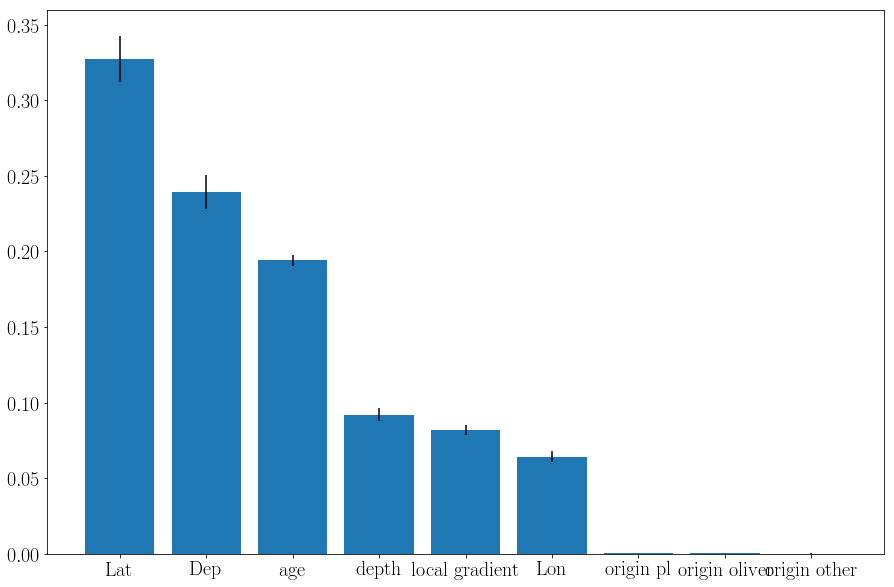

In [140]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot2grid((1,1),(0,0))

df_mean_importances = pd.DataFrame.from_dict(feature_importances_mean,orient='index').rename(columns={0:'mean'})
df_stdev_importances = pd.DataFrame.from_dict(feature_importances_stdev,orient='index').rename(columns={0:'stdev'})

df_importances = df_mean_importances.join(df_stdev_importances)
df_importances = df_importances.sort_values('mean',ascending=False)

ax.bar(np.arange(0,len(df_importances['mean']),1),df_importances['mean'])
ax.errorbar(x=np.arange(0,len(df_importances['mean']),1),y=df_importances['mean'],
             yerr=df_importances['stdev'],fmt='none',c='k',zorder=10)
ax.set_xticks(np.arange(0,len(df_importances['mean']),1))
ax.set_xticklabels([x.replace('_',' ') for x in df_importances.index])
print('')

['Lat',
 'Dep',
 'age',
 'depth',
 'local gradient',
 'Lon',
 'origin pl',
 'origin oliver',
 'origin other']

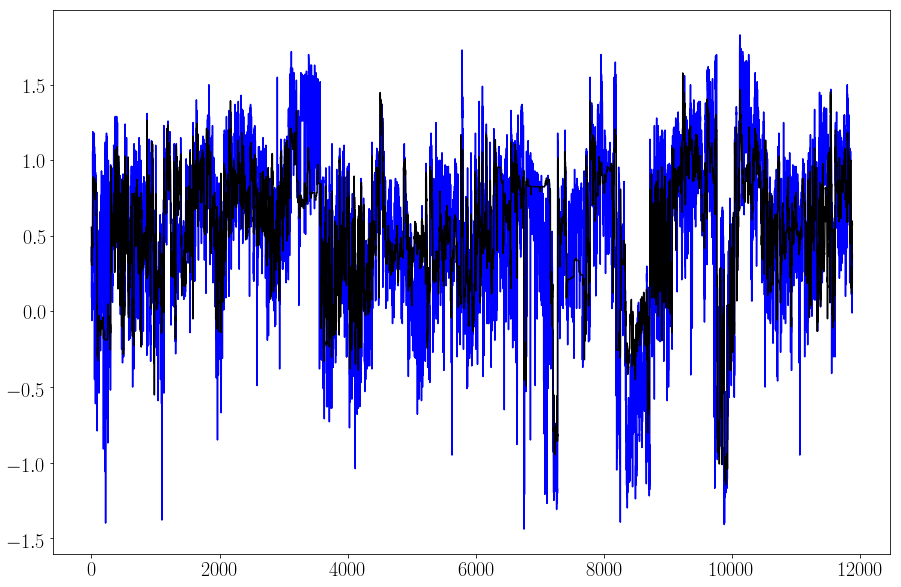

In [47]:
plt.figure(figsize=(15,10))
plt.plot(df_results.index, df_results.actual_d13C,c='b')
plt.plot(df_results.index, df_results.predicted_d13C,c='k')

plt.show()


['Lat',
 'Dep',
 'age',
 'depth',
 'gradient',
 'Lon',
 'origin_pl',
 'origin_oliver',
 'origin_other']

BT4
CH69_K09
CH73-139
CHN82-24
DSDP552
EN066-10
EN066-16
EN066-21
EN066-26
EN066-29
EN066-32
EN066-36
EN066-38
EN066-44
EW9209-1JPC
GEOB1028-5
GEOB2109-1
GEOB3801-6
GEOB4403-2
GIK11944-2
GIK12328-5
GIK12347-2
GIK12379-3
GIK12392-1
GIK13519-1
GIK15612-2
GIK15669
GIK15672
GIK16004
GIK16030
GIK16402
GIK16772-1
GIK16867
GIK17049-6
GIK17051
GIK17055-1
GIK23414-9
GIK23415-9
GIK23416-4
GIK23417-1
GIK23418-8
GIK23419
GIK23519
GeoB1032
GeoB1034
GeoB1035
GeoB1041
GeoB1101
GeoB1105
GeoB1112
GeoB1115
GeoB1117
GeoB1118
GeoB1211
GeoB1214
GeoB1710
GeoB4216
GeoB4240
GeoB7920-2
GeoB9508-5
GeoB9526
IODP-U1308
KF13
KNR110-50
KNR110-55
KNR110-58
KNR110-66
KNR110-71
KNR110-75
KNR110-82
KNR110-91
KNR140-37JPC
KNR159-36
KNR31-GPC5
M35003-4
MD03-2698
MD03_2664
MD07-3076
MD95-2040
MD95_2042
MD96-2080
MD99-2334
MD99-2339
NA87-22
NEAP18K
NO79-28
OCE205-7JPC
ODP1063
ODP1087
ODP1089
ODP1090_TTN057-6
ODP659
ODP664
ODP925
ODP926
ODP927
ODP928
ODP929
ODP980
ODP982
ODP983
ODP984
PO200-10-6-2
PS2082
PS2495
PS2498
RC13-